In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from PIL import Image


In [4]:
df=pd.read_csv("Supermarket Sales Cleaned.csv")

#### Distribution of Customer Ratings


Text(0, 0.5, 'Frequency')

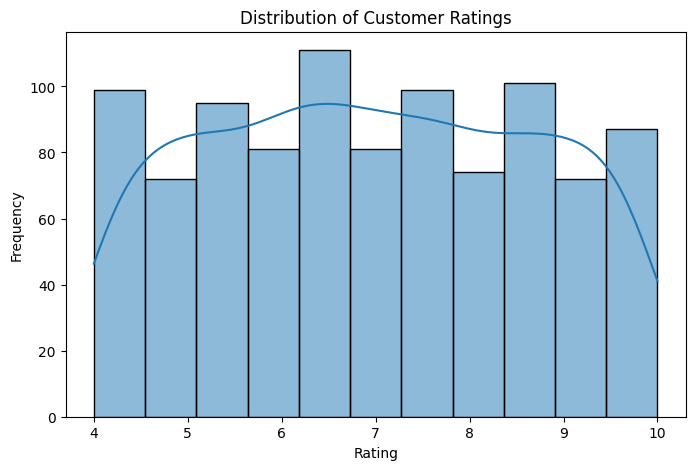

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'],kde=True)
plt.title('Distribution of Customer Ratings')
plt.xlabel("Rating")
plt.ylabel("Frequency");

#### Customer Type By Gender

<Axes: xlabel='Customer type', ylabel='count'>

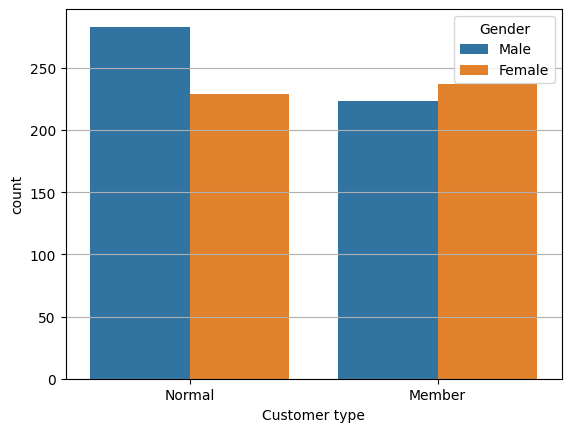

In [19]:
plt.Figure(figsize=(8,5))
plt.grid()
sns.countplot(x=df['Customer type'],hue=df['Gender'])

#### Product Line WordCloud

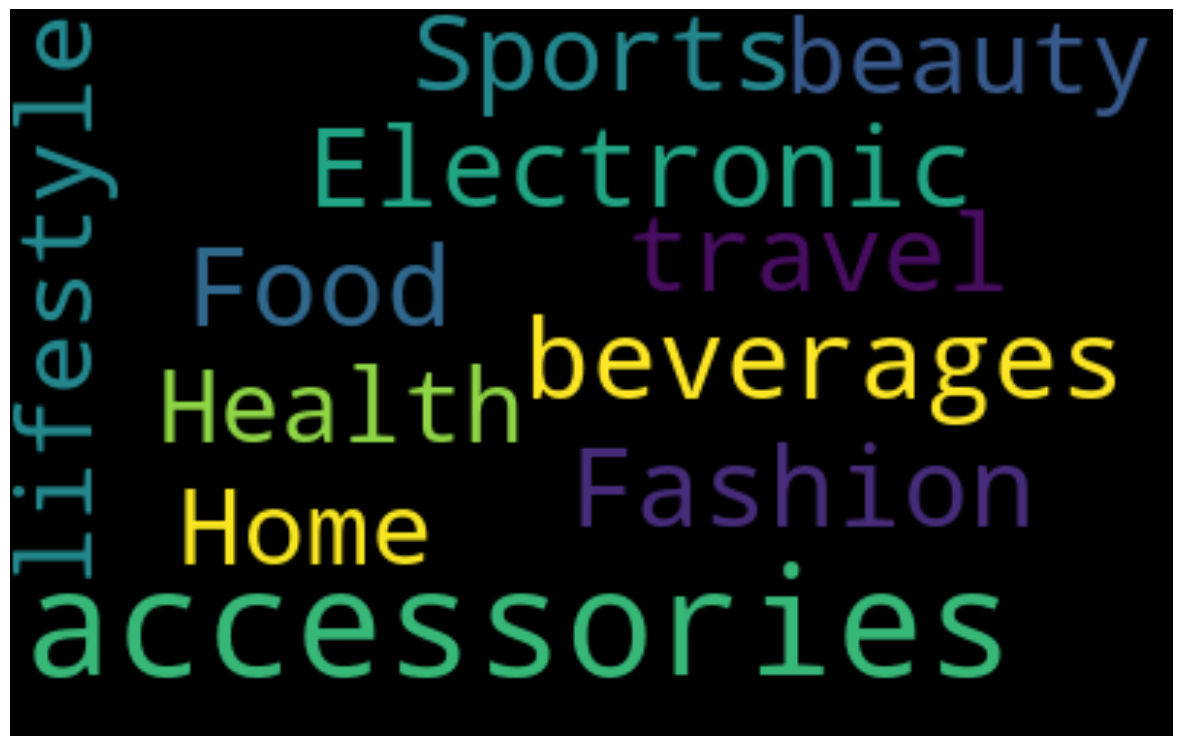

In [103]:
# Join the 'Product line' text into one string
text = " ".join(df['Product line'])

# Tokenize the text into words
words = word_tokenize(text)

# Get word frequencies
word_freq = Counter(words)
word_freq.pop("and")
# Create a word cloud with word frequencies
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(max_words=500, height=250, width=400, background_color="black", colormap='viridis').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### Product Lines By Gender

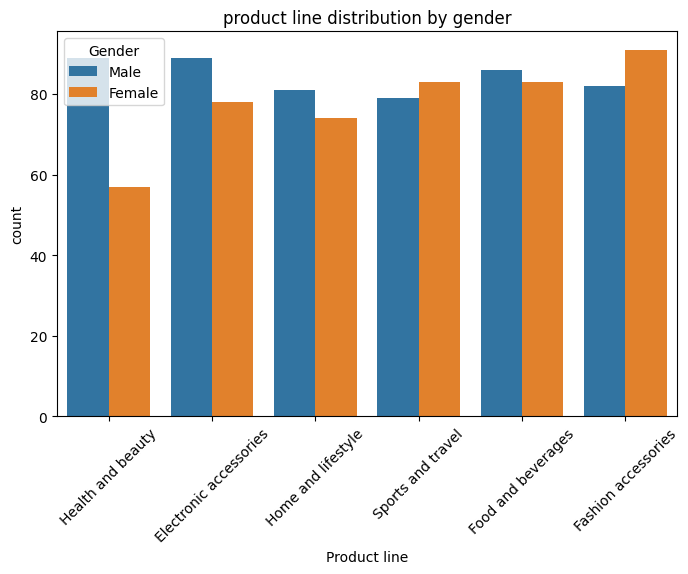

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Product line'],hue=df['Gender'])
plt.xticks(rotation=45)
plt.title("product line distribution by gender");


In [119]:
# Group by city and date, then calculate total sales per city per day
daily_sales = df.groupby(['City', 'Date'])['Total'].sum().reset_index()

# Calculate the average daily sales for each city
average_daily_sales_per_city = daily_sales.groupby('City')['Total'].mean().reset_index()

print("Average Daily Sales Per City:")
print(average_daily_sales_per_city)


Average Daily Sales Per City:
        City        Total
0   Mandalay  1216.169529
1  Naypyitaw  1204.623977
2     Yangon  1159.346854


#### See Correlation Between features

C:\Users\aisha\AppData\Local\Temp\ipykernel_12244\3428722273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


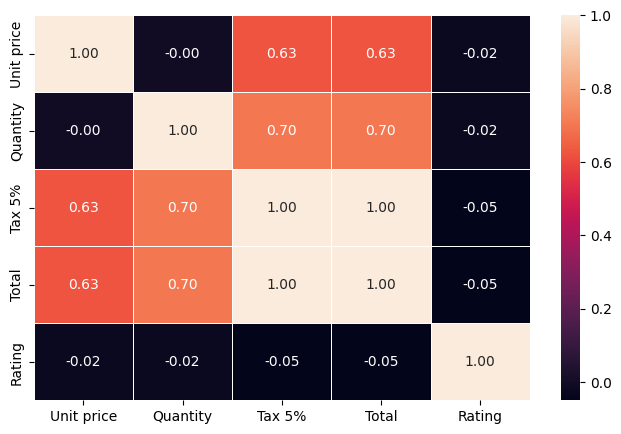

In [122]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.show()


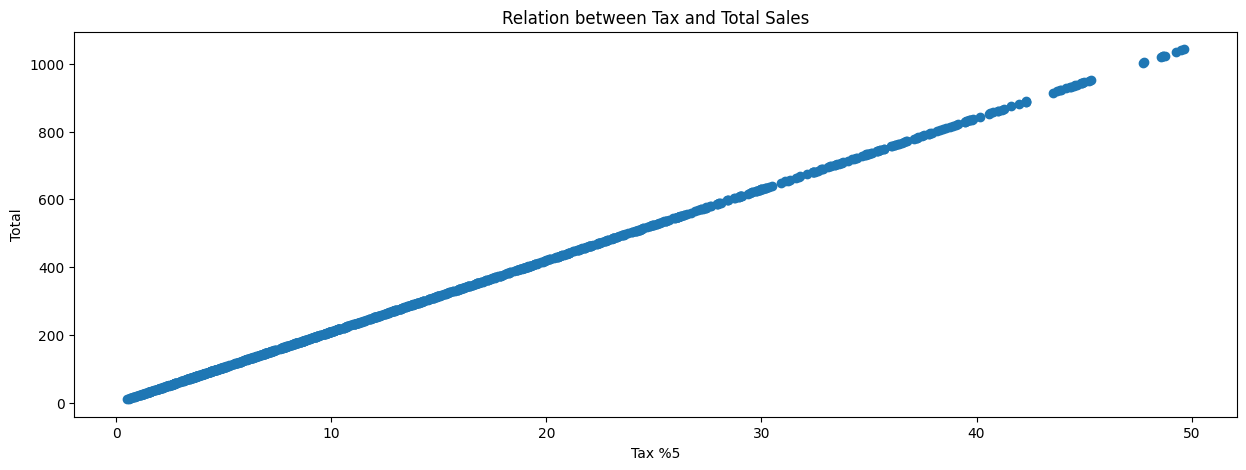

In [125]:
fig=plt.figure(figsize=(15,5))
plt.scatter(df['Tax 5%'],df['Total'])
plt.xlabel("Tax %5")
plt.ylabel("Total")
plt.title("Relation between Tax and Total Sales");

In [150]:
# Ensure that the column is date
df['Date'] = pd.to_datetime(df['Date'])
# Get days of week
df['day_of_week'] = df['Date'].dt.day_name()


##### Days Of Week and Total Sales

Text(0.5, 1.0, 'Days of Week and Total Sales')

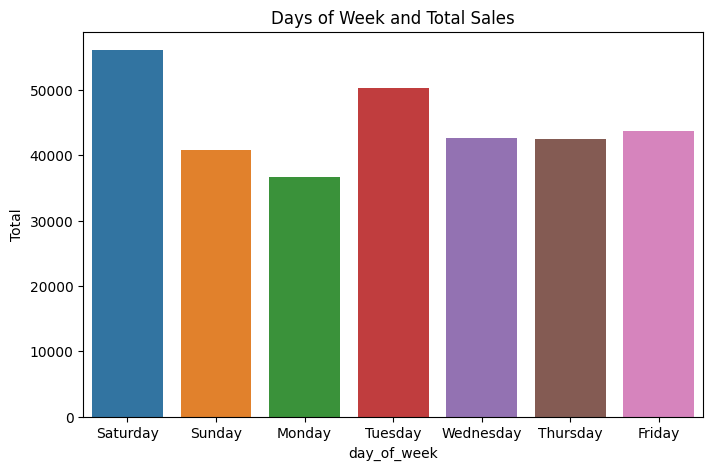

In [149]:
day_sales=df.groupby('day_of_week')['Total'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='day_of_week', y='Total', data=day_sales, order=['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday'])
plt.title("Days of Week and Total Sales");
